In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
titanic_data_train = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_data_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
titanic_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# for data manipulation we make a copy of the training dataset
training_copy_data = titanic_data_train.copy(deep = True)
data_cleaner = [training_copy_data,titanic_data_test]
titanic_data_train.info()
print(titanic_data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

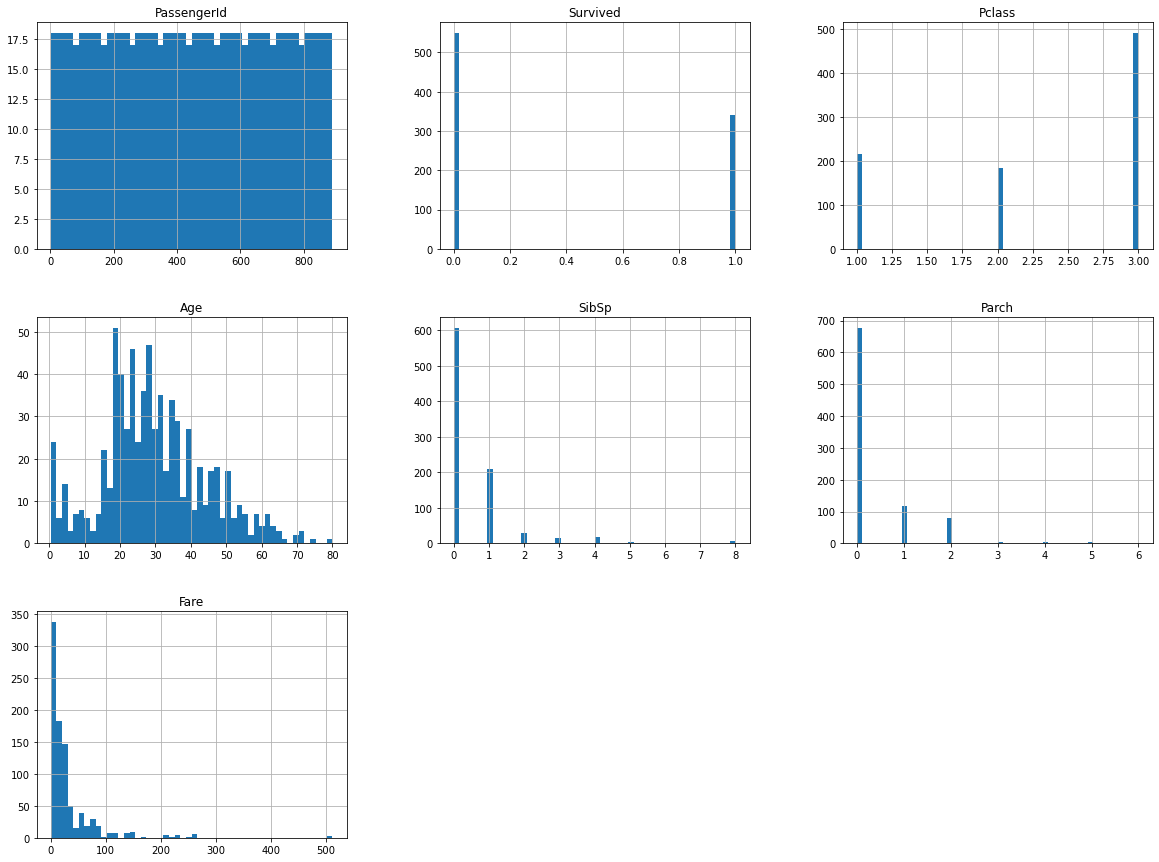

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

titanic_data_train.hist(bins= 50, figsize = (20,15))
plt.show()

In [6]:
print(training_copy_data.isnull().sum())
print("-"*10)
print(titanic_data_test.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
for dataset in data_cleaner:    
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
drop_columns = ['PassengerId', 'Cabin', 'Ticket']
training_copy_data.drop(columns = drop_columns, axis = 1, inplace = True)

print(training_copy_data.isnull().sum())
print("-"*10)
print(titanic_data_test.isnull().sum())


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [8]:
# adding more fetures that can help us to get better performace

for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset["IsAlone"] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    
    dataset['Title'] = dataset['Name'].str.split(',', expand = True)[1].str.split('.', expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset["AgeBin"] = pd.cut(dataset['Age'], 5)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
training_copy_data["Title"].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Ms                1
 Don               1
 Sir               1
 Lady              1
 the Countess      1
 Capt              1
 Jonkheer          1
 Mme               1
Name: Title, dtype: int64

In [10]:
#seting a min count 
stat_min = 10
title_names = (training_copy_data["Title"].value_counts()< stat_min)
training_copy_data['Title'] =  training_copy_data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
training_copy_data['Title'].value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64

In [11]:
print(training_copy_data.info())
print(titanic_data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dty

In [12]:
training_copy_data.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
165,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,20.5250,S,3,0,Master,"(14.454, 31.0]","(0.34, 16.336]"
403,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,15.8500,S,2,0,Mr,"(14.454, 31.0]","(16.336, 32.252]"
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,41.5792,C,4,0,Miss,"(31.0, 512.329]","(0.34, 16.336]"
834,0,3,"Allum, Mr. Owen George",male,18.0,0,0,8.3000,S,1,1,Mr,"(7.91, 14.454]","(16.336, 32.252]"
324,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,69.5500,S,11,0,Mr,"(31.0, 512.329]","(16.336, 32.252]"
429,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.336, 32.252]"
299,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,247.5208,C,2,0,Mrs,"(31.0, 512.329]","(48.168, 64.084]"
309,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,56.9292,C,1,1,Miss,"(31.0, 512.329]","(16.336, 32.252]"
645,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,76.7292,C,2,0,Mr,"(31.0, 512.329]","(32.252, 48.168]"
710,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,49.5042,C,1,1,Misc,"(31.0, 512.329]","(16.336, 32.252]"


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for dataset in data_cleaner:
    dataset['Sex_code'] = label_encoder.fit_transform(dataset['Sex'])
    dataset['Embarked_code'] = label_encoder.fit_transform(dataset['Embarked'])
    dataset['FareBin_code'] = label_encoder.fit_transform(dataset['FareBin'])
    dataset['AgeBin_code'] = label_encoder.fit_transform(dataset['AgeBin'])
    dataset['Title_code'] = label_encoder.fit_transform(dataset['Title'])

Target = ['Survived']
#features we want to select
training_copy_data_x = ['Pclass', 'Sex', 'Age','SibSp','Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone','Title']
training_copy_data_x_cal = ['Sex_code', 'Age', 'Embarked_code', 'Title_code', 'Pclass', 'Fare', 'SibSp','Parch']
training_copy_data_x_y = Target + training_copy_data_x
print('Original: ', training_copy_data_x_y)

training_copy_data_x_bin = ['Pclass', 'Sex_code', 'Embarked_code', 'FamilySize', 'AgeBin_code', 'FareBin_code', 'Title_code']
training_copy_data_xy_bin = Target + training_copy_data_x_bin

print('Bin X Y: ',training_copy_data_xy_bin)


training_dummpy = pd.get_dummies(training_copy_data[training_copy_data_x])
training_dummpy_x = training_dummpy.columns.tolist()
training_dummpy_xy = Target + training_dummpy_x
print('dummy X Y: ', training_dummpy_xy)

Original:  ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
Bin X Y:  ['Survived', 'Pclass', 'Sex_code', 'Embarked_code', 'FamilySize', 'AgeBin_code', 'FareBin_code', 'Title_code']
dummy X Y:  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc']


In [14]:
training_dummpy.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
0,3,22.0,1,0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,38.0,1,0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,26.0,0,0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,35.0,1,0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,35.0,0,0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


In [15]:
print(training_copy_data.isnull().sum())
print(titanic_data_test.isnull().sum())

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_code         0
Embarked_code    0
FareBin_code     0
AgeBin_code      0
Title_code       0
dtype: int64
PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilySize         0
IsAlone            0
Title              0
FareBin            0
AgeBin             0
Sex_code           0
Embarked_code      0
FareBin_code       0
AgeBin_code        0
Title_code         0
dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
#spliting the data

train_x, test_x, train_y, test_y = train_test_split(training_copy_data[training_copy_data_x_cal],
                                                    training_copy_data[Target], random_state = 0)

train_x_bin, test_x_bin, train_y_bin, test_y_bin = train_test_split(training_copy_data[training_copy_data_x_bin],
                                                    training_copy_data[Target], random_state = 0)

train_x_dummy, test_x_dummy, train_y_dummy, test_y_dummy = train_test_split(training_dummpy[training_dummpy_x],
                                                    training_copy_data[Target], random_state = 0)
print('original data shape: ', training_copy_data.shape)
print('train x data shape: ', train_x.shape)
print('train y data shape: ', train_y.shape)
print('test x data shape: ', test_x.shape)
print('test y data shape: ', test_y.shape)

original data shape:  (891, 19)
train x data shape:  (668, 8)
train y data shape:  (668, 1)
test x data shape:  (223, 8)
test y data shape:  (223, 1)


In [17]:
#hist to know the correlation

for x in training_copy_data_x: 
    if training_copy_data[x].dtype != 'float64':
        print('Survival of class: ', x)
        print(training_copy_data[[x, Target[0]]].groupby(x, as_index= False).mean())
        print('-'*10)
        
print(pd.crosstab(training_copy_data['Title'],training_copy_data[Target[0]]))

Survival of class:  Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------
Survival of class:  Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
----------
Survival of class:  SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
----------
Survival of class:  Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
----------
Survival of class:  Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
----------
Survival of class:  FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
----------
Sur

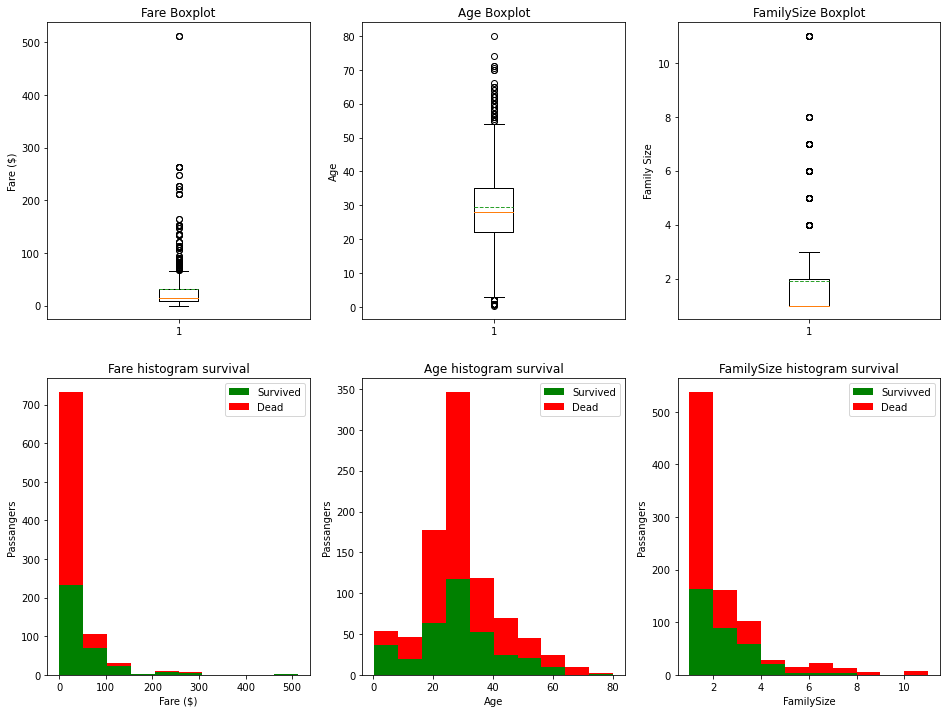

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16,12])

# graphical represention of quantative data
plt.subplot(231)
plt.boxplot(x= training_copy_data['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(x= training_copy_data['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(233)
plt.boxplot(x= training_copy_data['FamilySize'], showmeans = True, meanline = True)
plt.title('FamilySize Boxplot')
plt.ylabel('Family Size')

plt.subplot(234)
plt.hist(x = [training_copy_data[training_copy_data['Survived'] == 1]['Fare'],
              training_copy_data[training_copy_data['Survived'] == 0]['Fare']], stacked = True, color = ['g','r'],
        label = ['Survived', 'Dead'])
plt.title('Fare histogram survival')
plt.xlabel('Fare ($)')
plt.ylabel('Passangers')
plt.legend()

plt.subplot(235)
plt.hist(x = [training_copy_data[training_copy_data['Survived'] == 1]['Age'],
              training_copy_data[training_copy_data['Survived'] == 0]['Age']], stacked = True, color = ['g','r'],
        label = ['Survived', 'Dead'])
plt.title('Age histogram survival')
plt.xlabel('Age')
plt.ylabel('Passangers')
plt.legend()

plt.subplot(236)
plt.hist(x = [training_copy_data[training_copy_data['Survived'] == 1]['FamilySize'],
              training_copy_data[training_copy_data['Survived'] == 0]['FamilySize']], stacked = True, color = ['g','r'],
        label = ['Survivved', 'Dead'])
plt.title('FamilySize histogram survival')
plt.xlabel('FamilySize')
plt.ylabel('Passangers')
plt.legend()

plt.show()

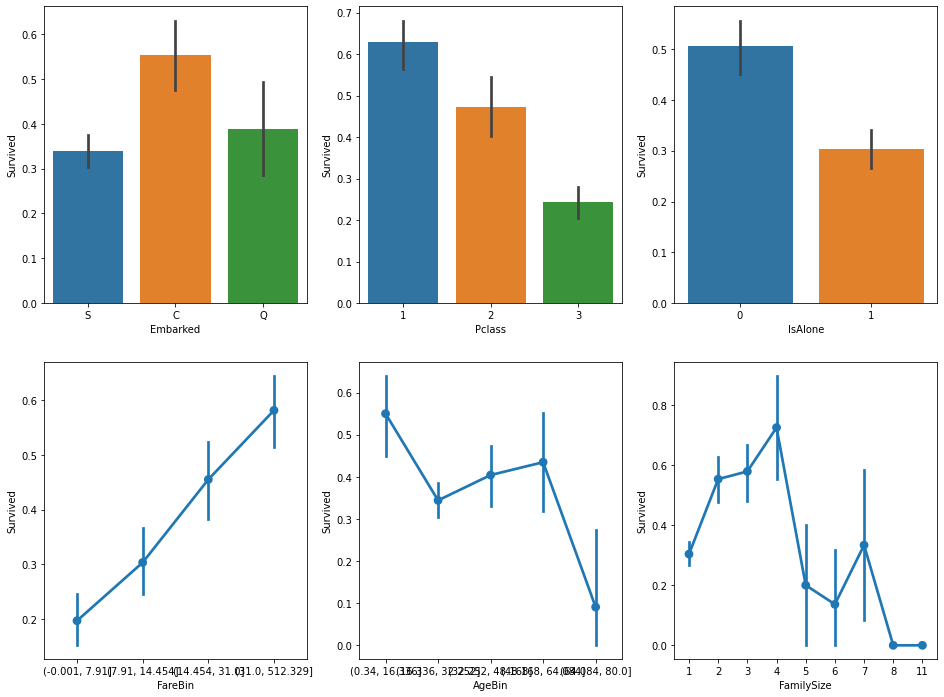

In [19]:
import seaborn as sns

# graphical represention of mutivariable data

fig, saxis = plt.subplots(2,3, figsize = (16,12))

sns.barplot(x='Embarked', y='Survived', data = training_copy_data, ax = saxis[0,0])
sns.barplot(x='Pclass', y='Survived', data = training_copy_data, order=[1,2,3], ax = saxis[0,1])
sns.barplot(x='IsAlone', y='Survived', data = training_copy_data, order=[0,1], ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y='Survived', data = training_copy_data, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y='Survived', data = training_copy_data, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y='Survived', data = training_copy_data, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs FamilySize Survival Comparison')

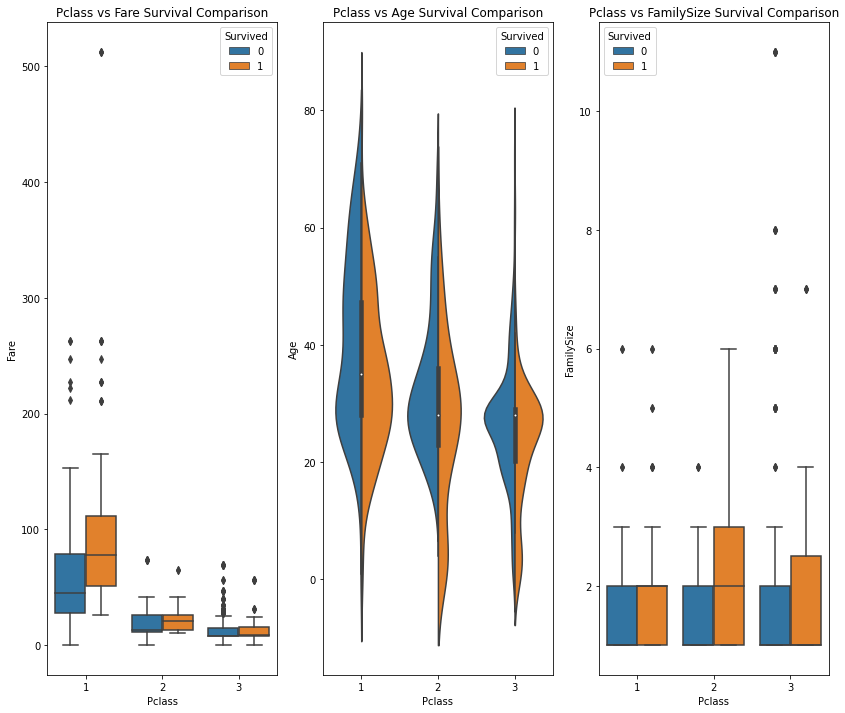

In [20]:
# comparing pclass with others

fig, (axis1,axis2, axis3) = plt.subplots(1,3, figsize = (14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', ax = axis1, data = training_copy_data)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x= 'Pclass', y = 'Age',  hue = 'Survived', ax = axis2, data = training_copy_data, split = True)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y = 'FamilySize', hue = 'Survived', ax = axis3, data = training_copy_data)
axis3.set_title('Pclass vs FamilySize Survival Comparison')


Text(0.5, 1.0, 'Sex vs Pclass Survival Comparison')

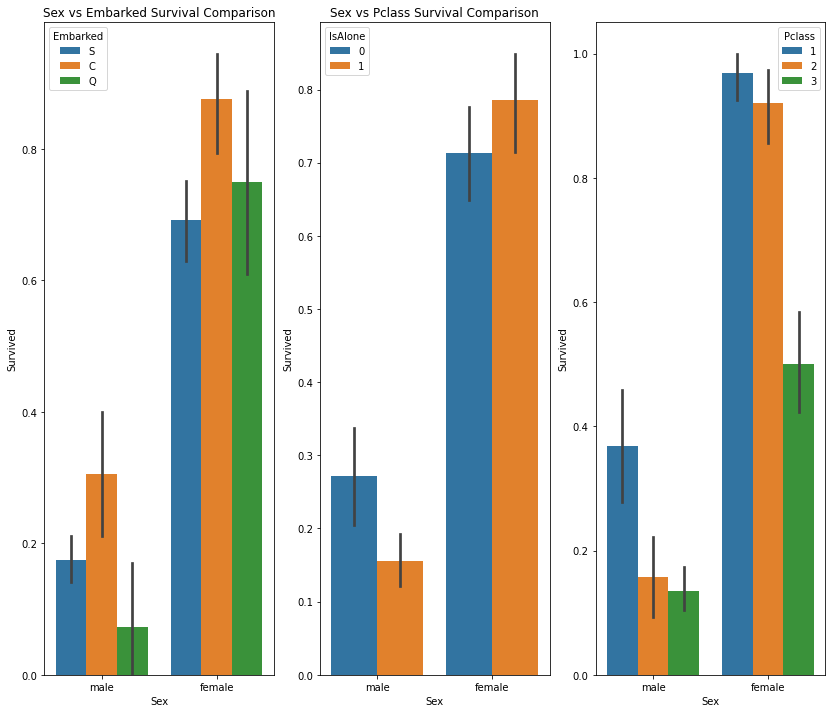

In [21]:
# comparision of sex with multivarible features

fig, (axis1,axis2, axis3) = plt.subplots(1,3, figsize = (14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', ax = axis1, data = training_copy_data)
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', ax = axis2, data = training_copy_data)
axis2.set_title('Sex vs IsAlone Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', ax = axis3, data = training_copy_data)
axis2.set_title('Sex vs Pclass Survival Comparison')

Text(0.5, 1.0, 'Pclass vs sex Survival comparison')

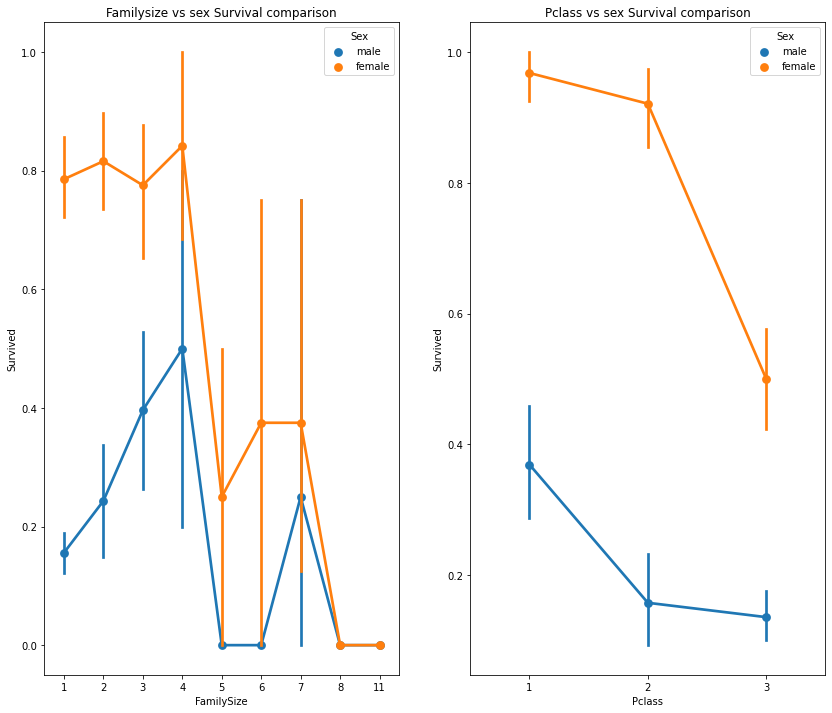

In [22]:
fig, (axis1,axis2) = plt.subplots(1,2, figsize = (14,12))

# family size factor with sex and survival compare

sns.pointplot(x = 'FamilySize', y='Survived', hue = 'Sex', ax = axis1, data =  training_copy_data)
axis1.set_title('Familysize vs sex Survival comparison')

sns.pointplot(x = 'Pclass', y='Survived', hue = 'Sex', ax = axis2, data =  training_copy_data)

axis2.set_title('Pclass vs sex Survival comparison')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


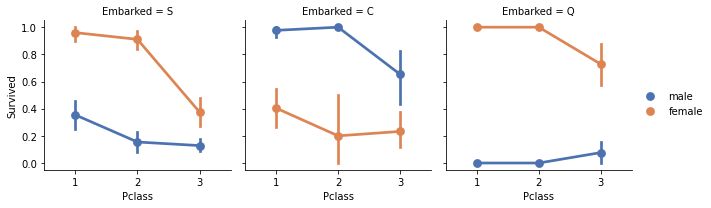

In [23]:
e = sns.FacetGrid(training_copy_data, col='Embarked')
e.map(sns.pointplot,'Pclass', 'Survived', 'Sex', ci=95.0,  palette = 'deep')
e.add_legend()

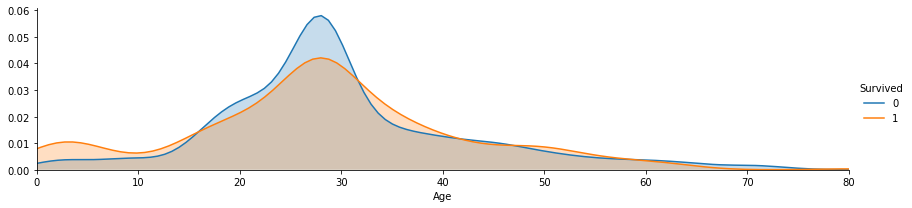

In [24]:
# comparision of sex and age 
a = sns.FacetGrid(training_copy_data, hue = 'Survived', aspect = 4)
a.map(sns.kdeplot, 'Age', shade = True)
a.set(xlim = (0, training_copy_data['Age'].max()))
a.add_legend()


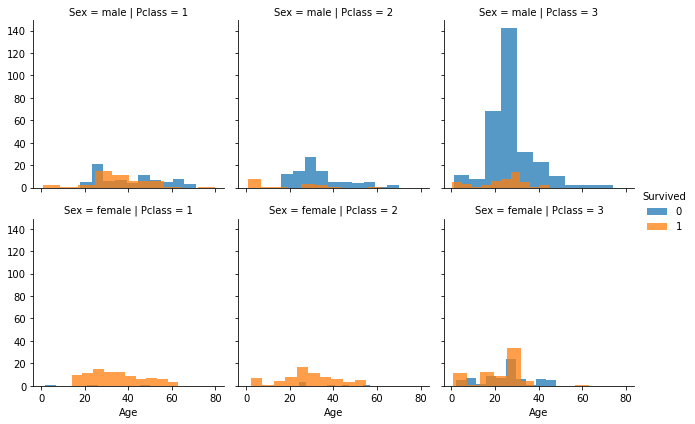

In [25]:
# comparision of sex, age, Pclass
h = sns.FacetGrid(training_copy_data, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha=0.75)
h.add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5660652d90>,
      dtype=object)

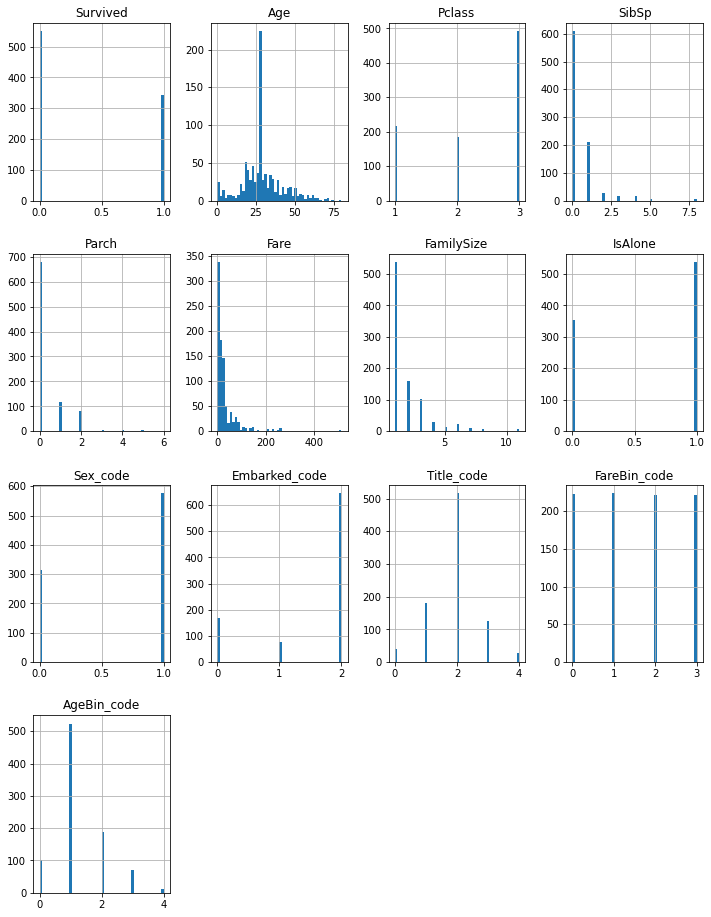

In [26]:
pl = training_copy_data[['Survived','Age', 'Pclass', 'SibSp','Parch','Fare','FamilySize','IsAlone','Sex_code','Embarked_code','Title_code','FareBin_code', 'AgeBin_code']]

pl.hist(bins= 50, figsize = (12,16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56613d4e50>,
      dtype=object)

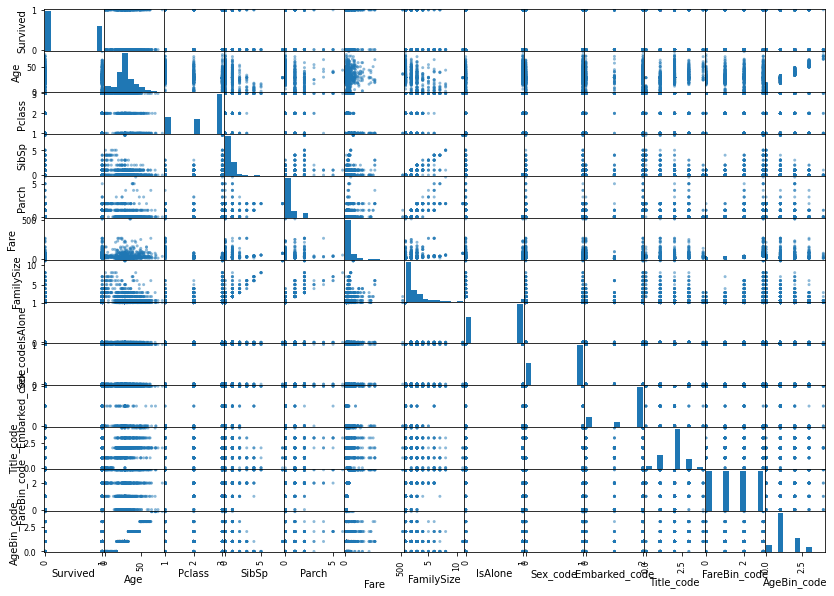

In [27]:
from pandas.plotting import scatter_matrix

scatter_matrix(pl, figsize=(14,10))

In [28]:
#modeling data
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate

MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    gaussian_process.GaussianProcessClassifier(),
    
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    neighbors.KNeighborsClassifier(),
    
    svm.SVC(probability = True),
    svm.NuSVC(probability = True),
    svm.LinearSVC(),
    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    XGBClassifier()   
]

cv_split = ShuffleSplit(n_splits = 10, test_size = 0.3, train_size = 0.6, random_state = 0)

MLA_columns = ["MLA Name", 'Parameters', 'MLA train accuracy mean', 'MLA test accuracy mean',
               'MLA test accuracy 3* STD','MLA time']

MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = training_copy_data[Target]

row_index = 0

for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    cv_result = cross_validate(alg, training_copy_data[training_copy_data_x_bin], training_copy_data[Target], cv = cv_split, return_train_score=True)
    print(cv_result.keys())
    MLA_compare.loc[row_index,'MLA time'] = cv_result['fit_time'].mean()
    MLA_compare.loc[row_index,'MLA train accuracy mean'] = cv_result['train_score'].mean()
    MLA_compare.loc[row_index,'MLA test accuracy mean'] = cv_result['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_result['test_score'].std()*3 
    
    alg.fit(training_copy_data[training_copy_data_x_bin], training_copy_data[Target])
    MLA_predict[MLA_name] = alg.predict(training_copy_data[training_copy_data_x_bin])

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA test accuracy mean'], ascending = False, inplace = True)
MLA_compare


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])


,MLA Name,Parameters,MLA train accuracy mean,MLA test accuracy mean,MLA test accuracy 3* STD,MLA time,MLA Test Accuracy 3*STD
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.830224,NaN,0.19071,0.067583
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.835206,0.827239,NaN,0.0555846,0.041599
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835955,0.826866,NaN,0.0464989,0.039163
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.890637,0.826119,NaN,0.12297,0.050609
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.824254,NaN,0.190044,0.056737
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.823134,NaN,0.00463123,0.050856
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.892322,0.822388,NaN,0.0291596,0.049355
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866854,0.820522,NaN,0.110677,0.050423
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.844007,0.81194,NaN,0.0053499,0.089999
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820225,0.810821,NaN,0.0918876,0.051065


In [29]:
MLA_compare.drop('MLA test accuracy 3* STD', axis = 1)

,MLA Name,Parameters,MLA train accuracy mean,MLA test accuracy mean,MLA time,MLA Test Accuracy 3*STD
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.830224,0.19071,0.067583
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.835206,0.827239,0.0555846,0.041599
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835955,0.826866,0.0464989,0.039163
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.890637,0.826119,0.12297,0.050609
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.824254,0.190044,0.056737
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.823134,0.00463123,0.050856
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.892322,0.822388,0.0291596,0.049355
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866854,0.820522,0.110677,0.050423
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.844007,0.81194,0.0053499,0.089999
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820225,0.810821,0.0918876,0.051065


In [30]:
import random
from sklearn.metrics import accuracy_score
#making a random model
for index, row in training_copy_data.iterrows():
    if random.random() > 0.5:
        training_copy_data.at[index, 'Random_Prediction'] = 1
    else: training_copy_data.at[index, 'Random_Prediction'] = 0


training_copy_data['Random_Score'] = 0
training_copy_data.loc[(training_copy_data['Survived'] == training_copy_data['Random_Prediction']), 'Random_Score'] = 1

print('accuracy of the model', training_copy_data['Random_Score'].mean()*100)
print('sklearn score', accuracy_score(training_copy_data['Survived'],training_copy_data['Random_Score'])*100)

accuracy of the model 48.148148148148145
sklearn score 51.627384960718295


In [31]:
pivot_female = training_copy_data[training_copy_data['Sex'] == 'female'].groupby(['Sex', 'Pclass', 'Embarked', 'FareBin'])['Survived'].mean()
print('tree of female survival: ', pivot_female)
pivot_male = training_copy_data[training_copy_data['Sex'] == 'male'].groupby(['Sex', 'Title'])['Survived'].mean()

print('tree of male survival: ',pivot_male )


tree of female survival:  Sex     Pclass  Embarked  FareBin        
female  1       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]          NaN
                          (31.0, 512.329]    1.000000
                S         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN
              

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[[473  76]
 [ 95 247]]


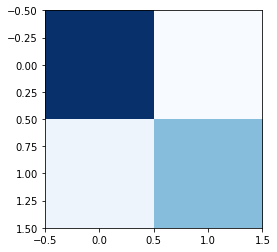

In [32]:
# making confusion matrix to see accuracy and recall values
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

tree = RandomForestClassifier()
y_predict = cross_val_predict(tree, training_copy_data[training_copy_data_x_bin], training_copy_data[Target], cv = 3)
con_mat = confusion_matrix(training_copy_data[Target],y_predict)
print(con_mat)
plt.imshow(con_mat, interpolation='nearest', cmap= plt.cm.Blues)


In [33]:
# working with hyperparaments
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
btree = RandomForestClassifier(random_state = 0, )

base_results = cross_validate(btree, training_copy_data[training_copy_data_x_bin],  training_copy_data[Target], cv= cv_split, return_train_score=True)
btree.fit(training_copy_data[training_copy_data_x_bin],  training_copy_data[Target])

print('BEFORE DT Parameters: ', btree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,None],
    'max_features':['sqrt', 'log2', None],
    'random_state': [0]
}

tune_model = GridSearchCV(btree , param_grid=params, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(training_copy_data[training_copy_data_x_bin],  training_copy_data[Target])



/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

BEFORE DT Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.80
BEFORE DT Test w/bin score 3*std: +/- 6.10
BEFORE DT Test w/bin set score min: 79.48
----------


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'random_state': [0]},
             scoring='roc_auc')

In [34]:
print('AFTER DT Parameters: ', tune_model.best_params_)
print(tune_model.cv_results_.keys())
# print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
# #print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
# print('-'*10)

AFTER DT Parameters:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'random_state': 0}
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_random_state', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
AFTER DT Test w/bin score mean: 88.12
AFTER DT Test w/bin score 3*std: +/- 7.03


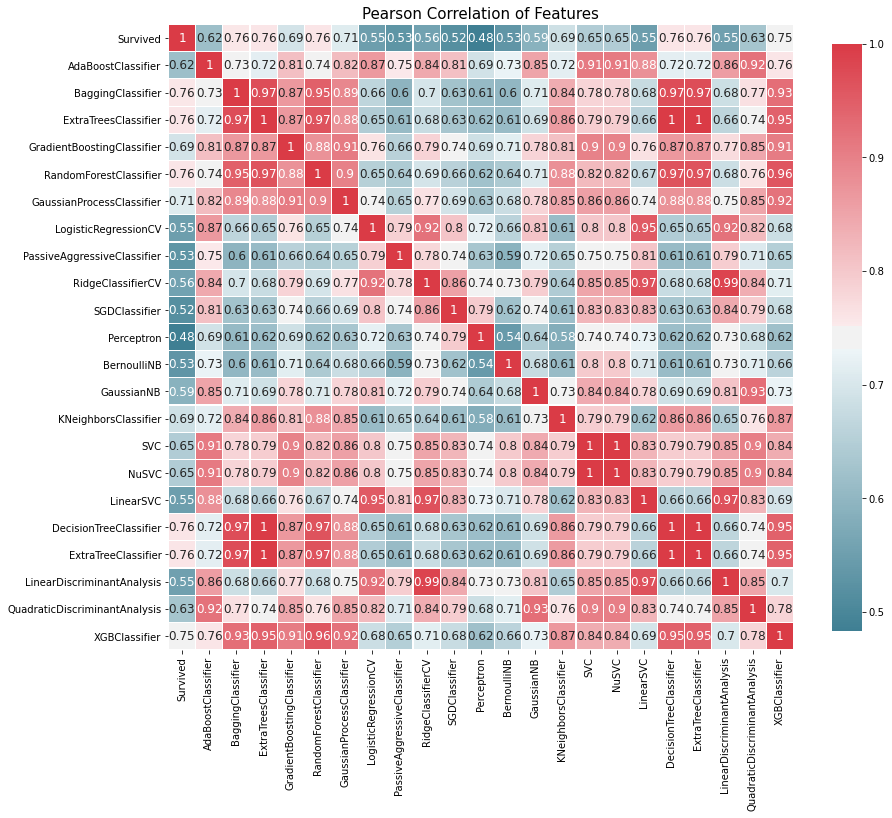

In [35]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(MLA_predict)


In [36]:
model = RandomForestClassifier(criterion= 'entropy', max_depth= 4, max_features = None, n_estimators= 1000, random_state = 0)
model.fit(training_copy_data[training_copy_data_x_bin], training_copy_data[Target])
titanic_data_test['Survived'] = model.predict(titanic_data_test[training_copy_data_x_bin])

submit = titanic_data_test[['PassengerId','Survived']]
submit.to_csv("../working/submit.csv", index=False)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
